Name- Dhanji Kumar Gupta

The Spark Foundation GRIPjanuary2022

Data Science and Business Analytics Intern at The Spark Foundation

# Task-1 Prediction using Supervised ML

Predict the Percentage of an student based on the no. of study hours.

Importing The Library

We will start by importing all the library required for Task.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

How will read the data from the remote link

In [3]:
data=pd.read_csv("data.csv")
print("data imported successfully")

data imported successfully


Data overview

In [4]:
data.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.shape

(25, 2)

In [110]:
data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [111]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Now we plot the Datapoint on 2D graph and if we can find any relationship between data.

By using plot() function of Pandas Dataframe and we will pass column name for x-coordinate i.e "Scores" and y-coordinate i.e "Hours"

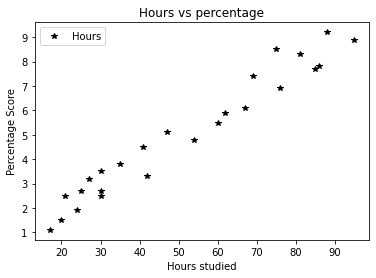

In [7]:
data.plot(x="Scores",y="Hours", style="*",color="Black")
plt.title("Hours vs percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.show()

From the above Graph we can conclude that there is Linear Relationship between Hours studied and Percentage score.

Now divide the data into attributes and labels.attributes are independent variables and labels are dependent variables.Dependent 
variables are ones of whose values are predicts.in our dataset we want to predict the percentage score.so in our dataset attributes
will be the "Hours" column and labels will be the "scores" column.

In [8]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [9]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training
and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method.The Below code will split 80% of Data to training
sets and 20% of data to test sets.

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

We have split our data into training and testing sets, and now is finally the time to train our
algorithm.

In [12]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("training complete")

training complete


 Plotting the regression line

In [13]:
regressor.coef_

array([9.91065648])

In [14]:
regressor.intercept_

2.018160041434683

In [15]:
line=regressor.coef_*x+regressor.intercept_

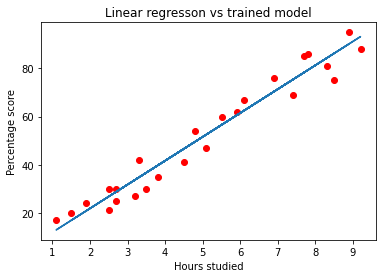

In [122]:
plt.title("Linear regresson vs trained model")
plt.scatter(x,y,color="red")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.plot(x,line)
plt.show()

Prediction

We have trained our algorithm.Now we will make  the prediction .y_pred is numpy array that contation all the predict values for the input values
in the x_test series

In [16]:
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing Actual vs Predicted

In [19]:
df=pd.DataFrame({'actual':y_test, "predicted":y_pred})

In [20]:
df

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

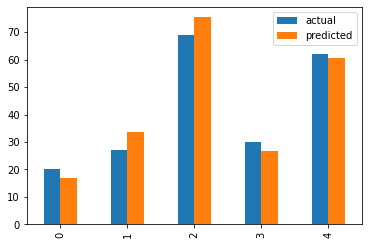

In [127]:
df.plot(kind="bar")

Now we can also test with your own data

In [21]:
hours=9.25
pred=regressor.predict([[9.5]])
print("no of hours ={}".format(hours))
print('predicted score={}'.format(pred[0]))

no of hours =9.25
predicted score=96.16939660753593


Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly
important to compare how well different algorithms perform on a particular dataset. For
simplicity here, we have chosen the mean square error. There are many such metrics.for regression algorithm three evalution metrics
are comonly  used.1- Mean Absolute error. 2.-Mean squared error.3-Root mean squared error

In [22]:
from sklearn import metrics

In [23]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared erroris :',metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean squared erroris : 21.5987693072174
Root mean squared error is: 2.0454485813637495
